<a href="https://colab.research.google.com/github/Siddhi232001/GRIP-TASK-3/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis - Retail**

The following code is executed by **Siddhi Kelshikar**

**STEP 1: Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

**STEP 2: Loading Dataset**

In [ ]:
d = pd.read_csv("/content/SampleSuperstore dataset.csv")
df = pd.DataFrame(d)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**STEP 3: Data Preprocessing**

In [ ]:
# Examining any missing value
d.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
# Getting more details about the data
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
# Describe the data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


From the decribe data we can see that:

**Sales**

Min Sales: 0.444000

Max Sales: 22638.480000

**Profit**

Min Profit: -6599.978000

Max Profit: 8399.976000

In [ ]:
# Total Sales:
print("Total sales are {}".format (df["Sales"].sum ()))

#Total Profit:
print("Total profit is {}". format (df["Profit"].sum()))

Total sales are 2297200.8603000003
Total profit is 286397.0217


In [ ]:
# Removing unwanted columns
df.drop(["Country", "Postal Code"], axis = 1, inplace = True)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.shape

(9994, 11)

In [ ]:
df.duplicated().sum()

50

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
df.duplicated().sum()

0

**STEP 4: Analyzing data**

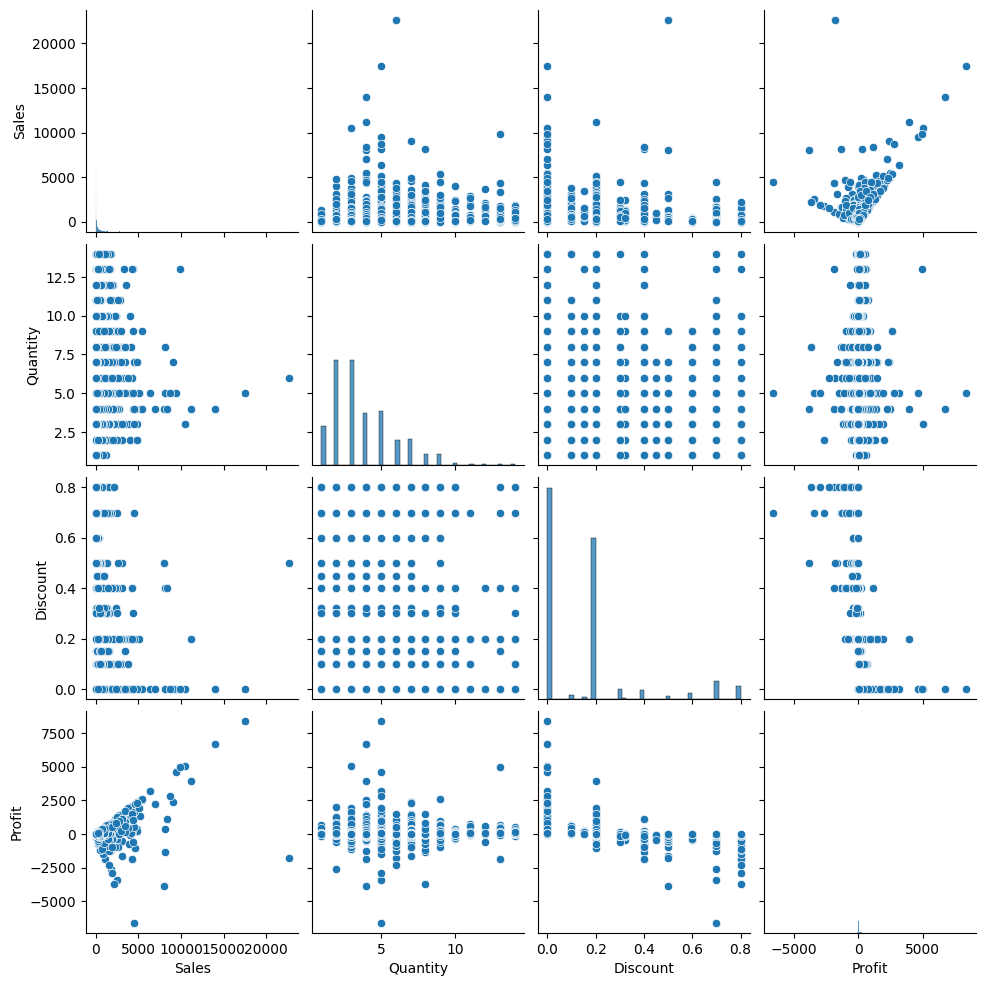

In [ ]:
# PLotting graph
sns.pairplot(df)

1. As Discount increases Profit decreases
2. As Discount increases Sales decreases
3. As Sales increases Profit increases

In [ ]:
# Correlation data
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


<ipython-input-24-19f4138810a8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


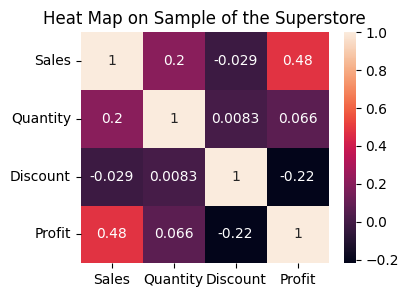

In [ ]:
# Plotting Heatmap
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(),annot=True)
plt.title ("Heat Map on Sample of the Superstore")
plt.show()


1. Most correlation: Sales and Profit
2. Least correlation: Discount and Quantity

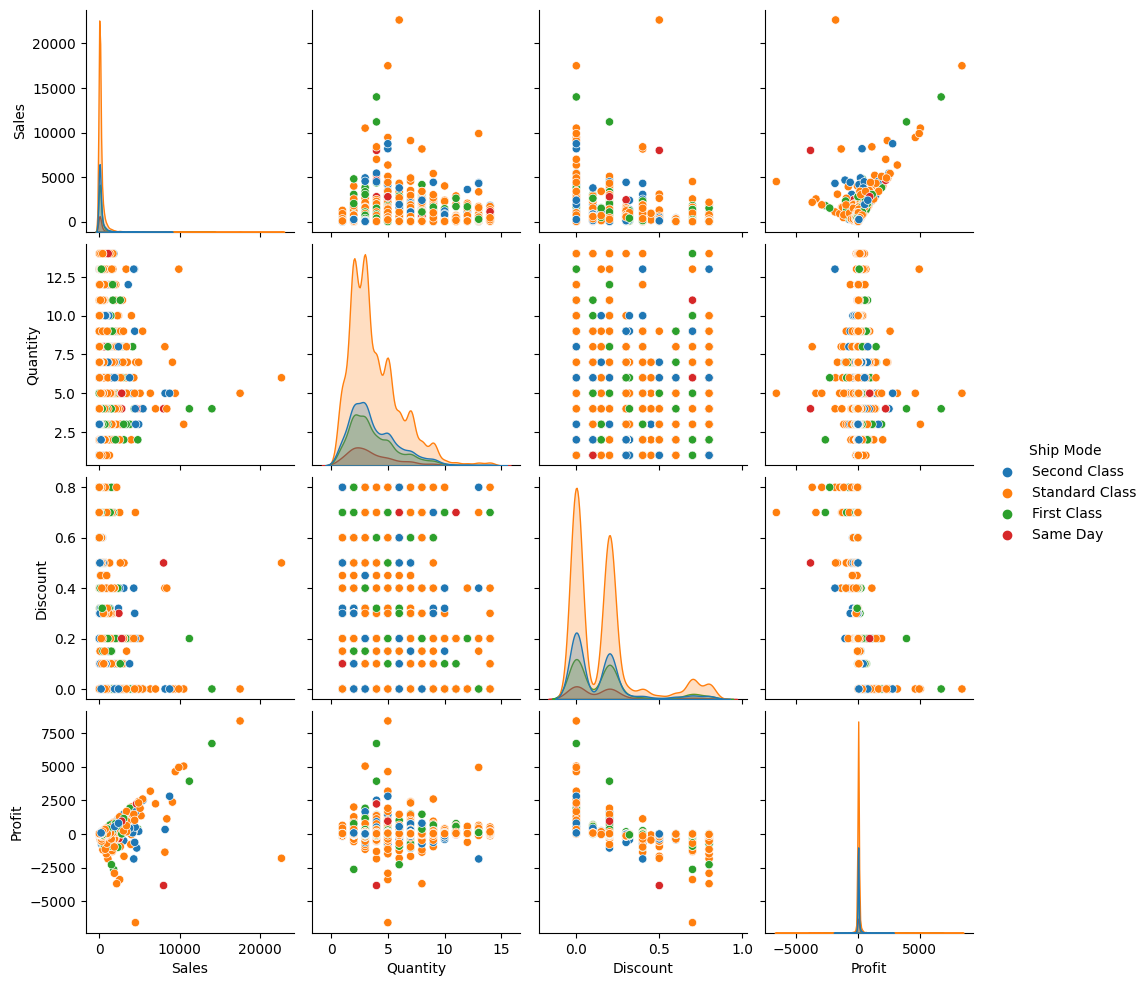

In [ ]:
# Plotting Pairplot using "Ship Mode"
sns.pairplot (df, hue = "Ship Mode")

In [ ]:
# Finding unique values
df["Ship Mode"].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

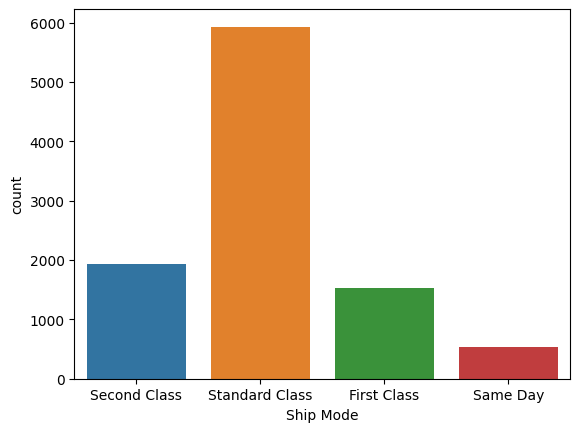

In [ ]:
sns.countplot(x=df["Ship Mode"])

1. Most opted Ship Mode: Standard Class
1. Least opted Ship Mode: Same Day


In [ ]:
# Grouping the Data
ps = df.groupby("Ship Mode")[["Profit", "Sales"]].sum()
ps

,Profit,Sales
Ship Mode,,
First Class,48910.4477,3.512746e+05
Same Day,15871.8869,1.283217e+05
Second Class,57425.5716,4.591240e+05
Standard Class,163889.6517,1.355879e+06


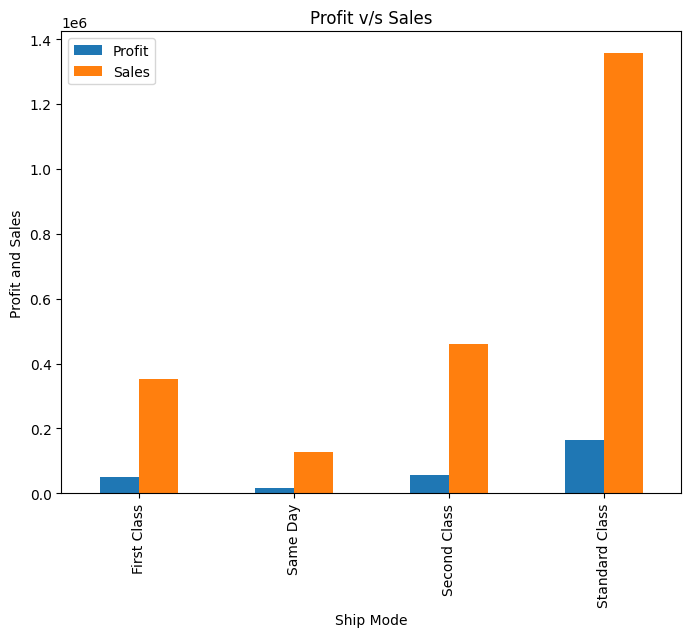

In [ ]:
ps.plot(kind="bar", figsize=(8,6))
plt.title("Profit v/s Sales")
plt.ylabel("Profit and Sales")
plt.show()

1. Maximum Profit and Sales : Standard Class
2. Minimum Profit and Sales : Same Day

**STEP 5: Analyzing Category Data**

In [ ]:
# Counting Categories
cat = df["Category"].value_counts()
cat

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

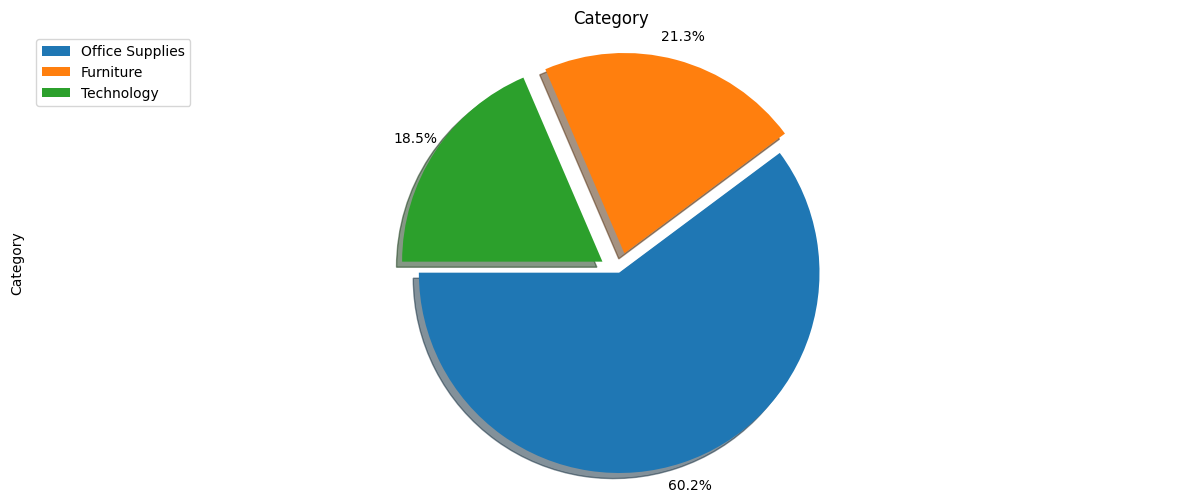

In [ ]:
# Plotting Pie Chart
explode_list = [0,0.1,0.1]
cat.plot(kind="pie", figsize = (15,6), autopct="%1.1f%%", shadow=True, startangle=180,
         explode=explode_list, labels= None, pctdistance=1.12)
plt.title("Category")
plt.axis("equal")
plt.legend(labels=cat.index,loc="upper left")
plt.show()


Major distribution of business is in Office Supplies and Least in Technology

In [ ]:
# Category wise Sales
cs =df.groupby("Category").Sales.sum()
#Category wise Profit
cp = df.groupby("Category").Profit.sum()

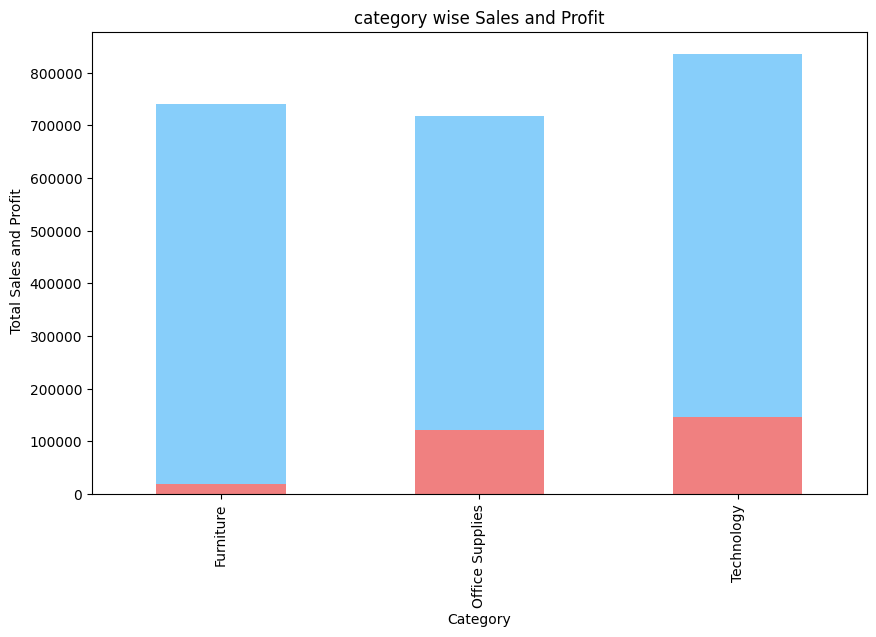

In [ ]:
#Sales
ax0=cs.plot(kind="bar", figsize = (10,6), color="lightskyblue")

#Profit
ax0=cp.plot(kind="bar", figsize = (10,6), color="lightcoral")

ax0.set_title("category wise Sales and Profit")
ax0.set_ylabel(" Total Sales and Profit")

plt.show()

1. Maximum Proft and Sales in Category: Technology
2. Minimum Profit and Sales in Category: Office Supplies

**STEP 6: Analyzing Sub-Catergory Data**

In [ ]:
sub = df["Sub-Category"].value_counts()
sub

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<ipython-input-59-7ced592d56c8>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap ('Spectral')


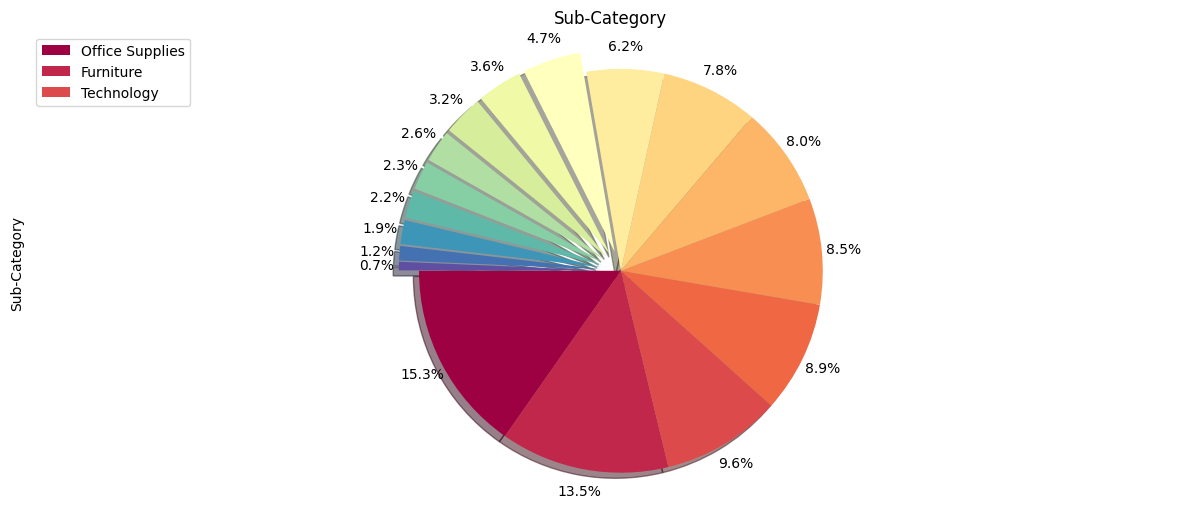

In [ ]:
# Plotting Pie chart
from matplotlib import cm
cmap = cm.get_cmap ('Spectral')
explode_list=[0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
sub.plot(kind="pie", figsize=(15,6), autopct="%1.1f%%", shadow=True, startangle=180,
         explode=explode_list, labels=None, pctdistance=1.11, cmap=cmap)
plt.title("Sub-Category")
plt.axis("equal")
plt.legend(labels=cat.index,loc="upper left")
plt.show()



1. Major distribution of business is in Binders, Paper and Furnishings
2. Least distribution of business is in Copiers, Machine and Supplies

**STEP 7: Analyzing Category and Sub-Catergory Data**



In [ ]:
x = df.groupby(["Category", "Sub-Category"]). Sales.sum()
y = df.groupby(["Category", "Sub-Category"]). Profit.sum()

**SALES**

Text(0, 0.5, 'Sales')

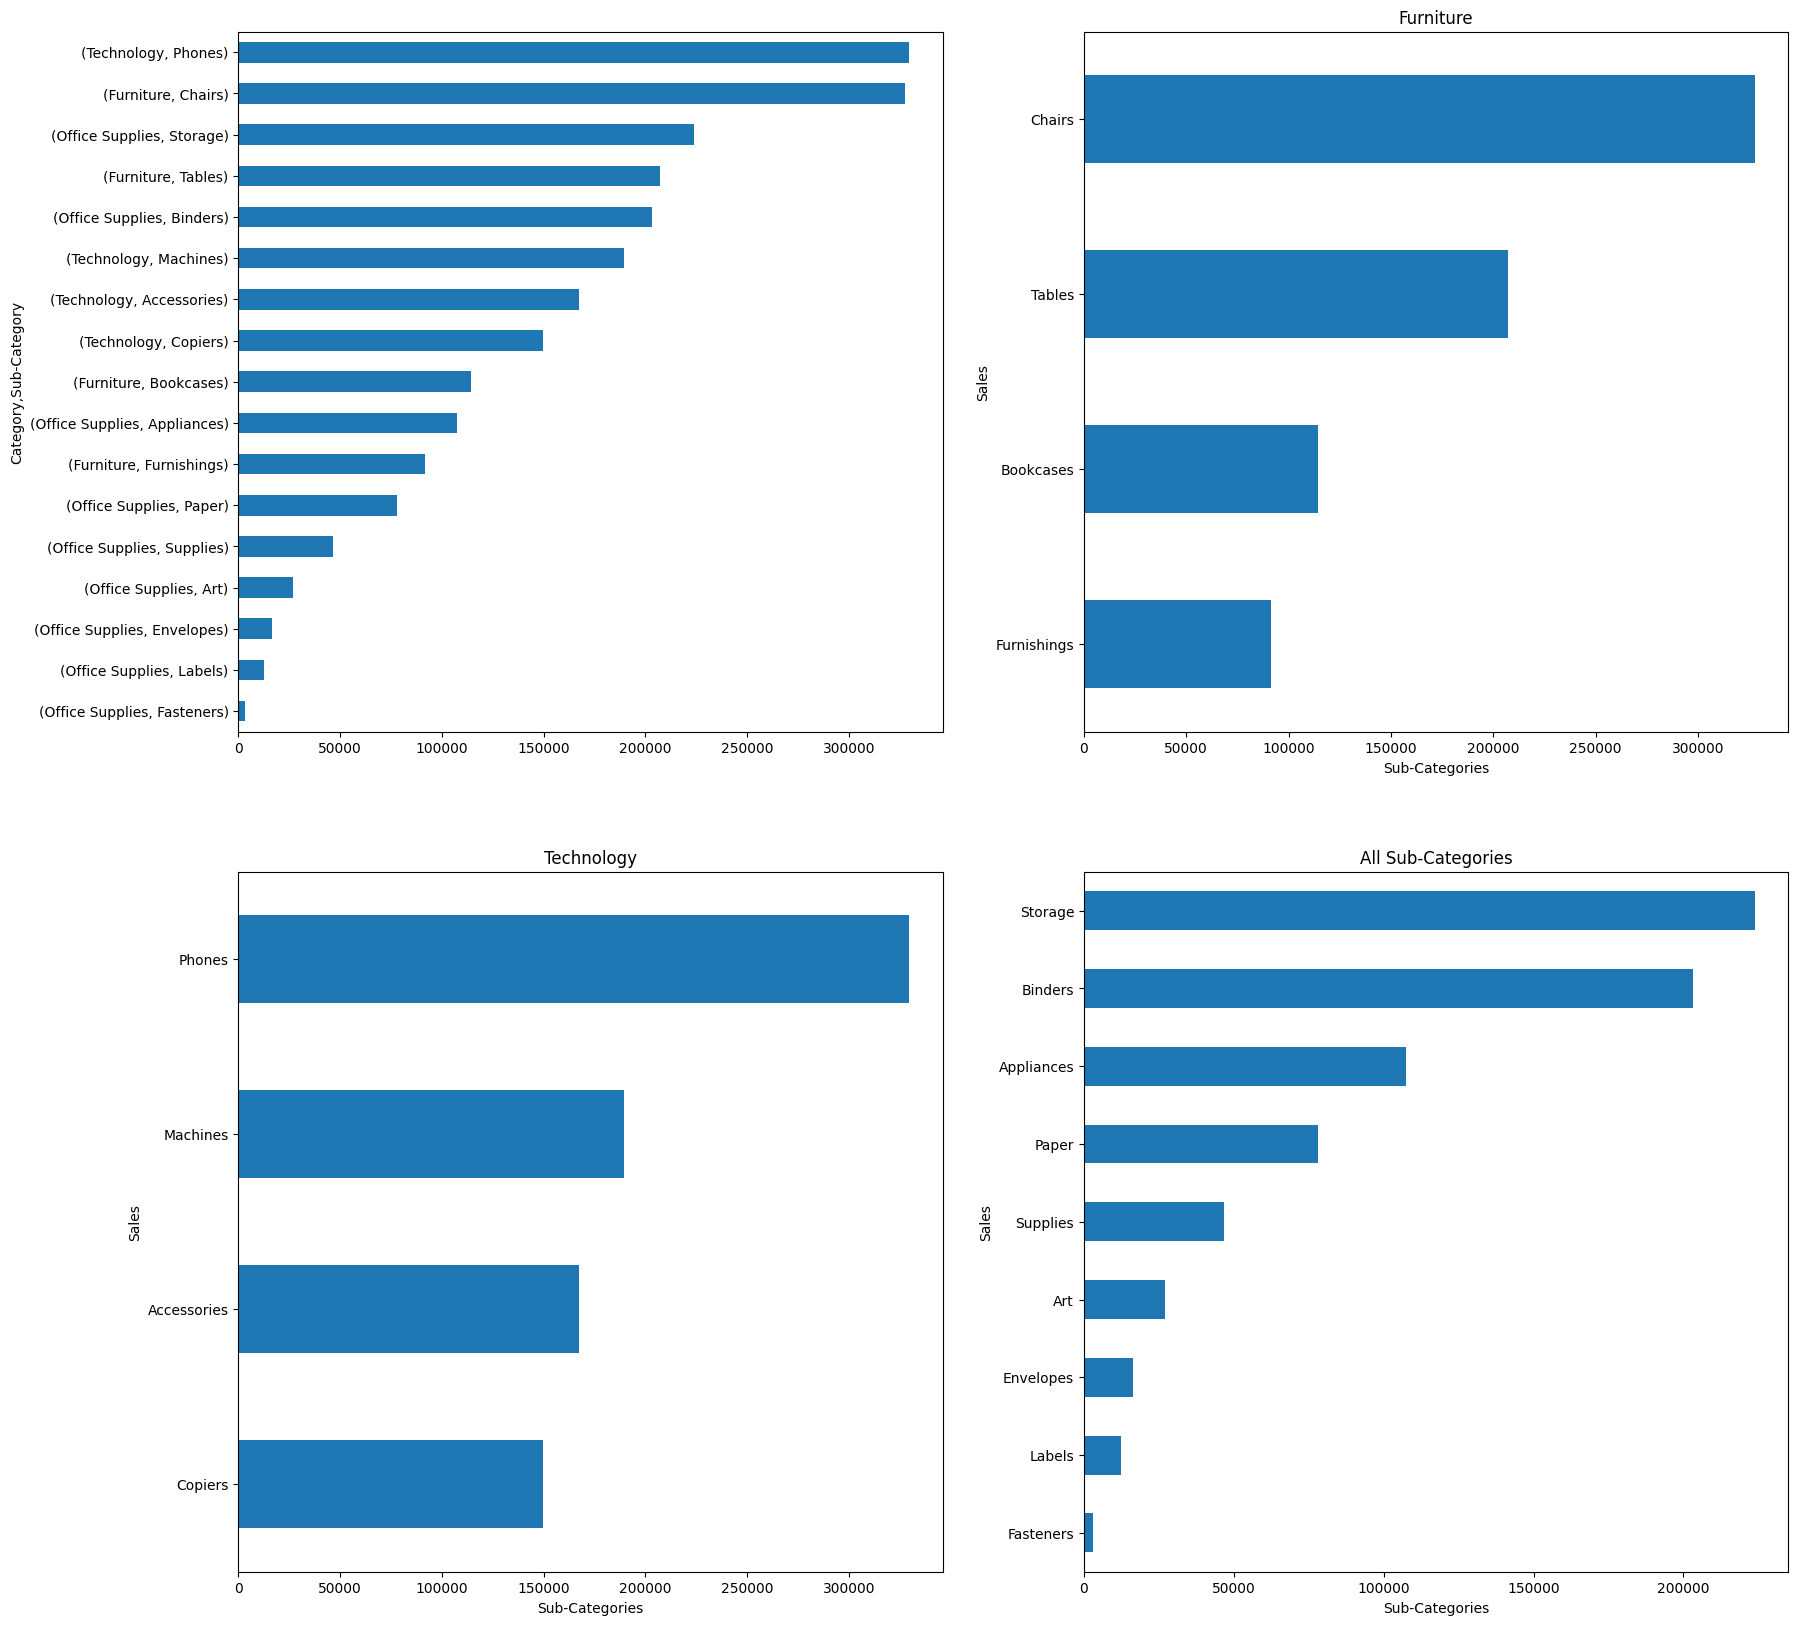

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax1)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

#Technology
x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")

#Office Supplies
x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

#Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax0)
ax3.set_title("All Sub-Categories")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")


1. Maximum Sales in: Phones(Technology), Chairs(Furniture) and Storage(Office Supplies)
2. Minimum Sales in: Fasteners, Labels and Envelopes(Office Supplies)

**PROFIT**

Text(0, 0.5, 'Profits')

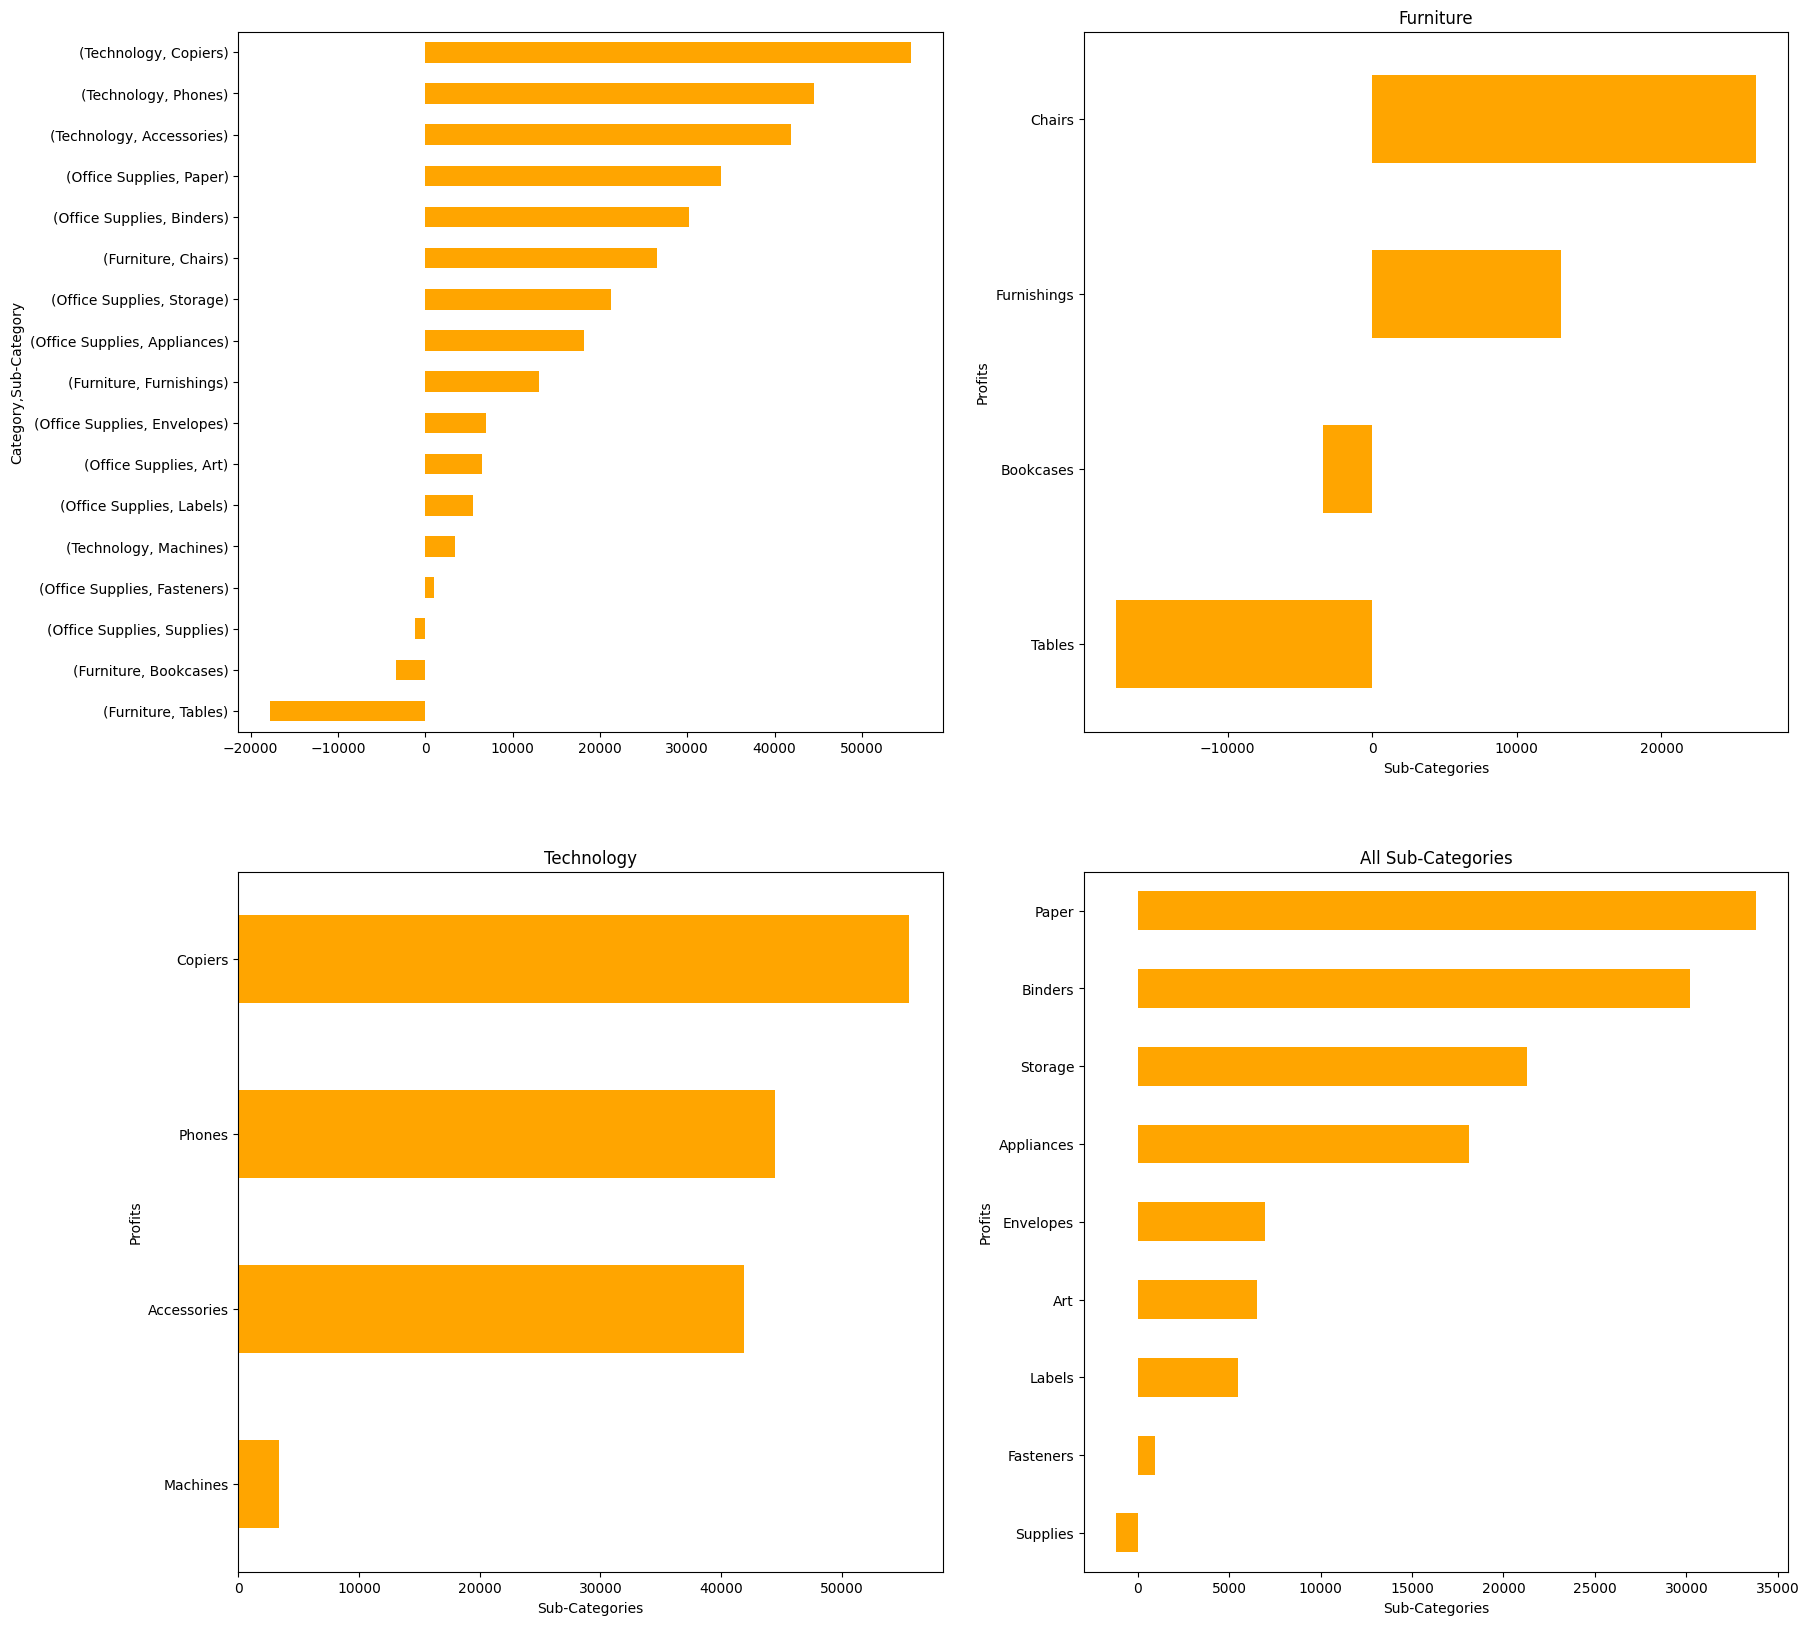

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax1, color="orange")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")

#Technology
y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax2, color="orange")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profits")

#Office Supplies
y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax3, color="orange")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profits")

#Total
y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax0, color="orange")
ax3.set_title("All Sub-Categories")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profits")


1. Maximum Profit in: Copiers, Phones and Accessories (Technology)
2. Loss in: Tables and Bookcases (Furniture) and Suppliers (Office Supplies)

**SALES AND PROFIT COMBINED**

Text(0, 0.5, 'Profits')

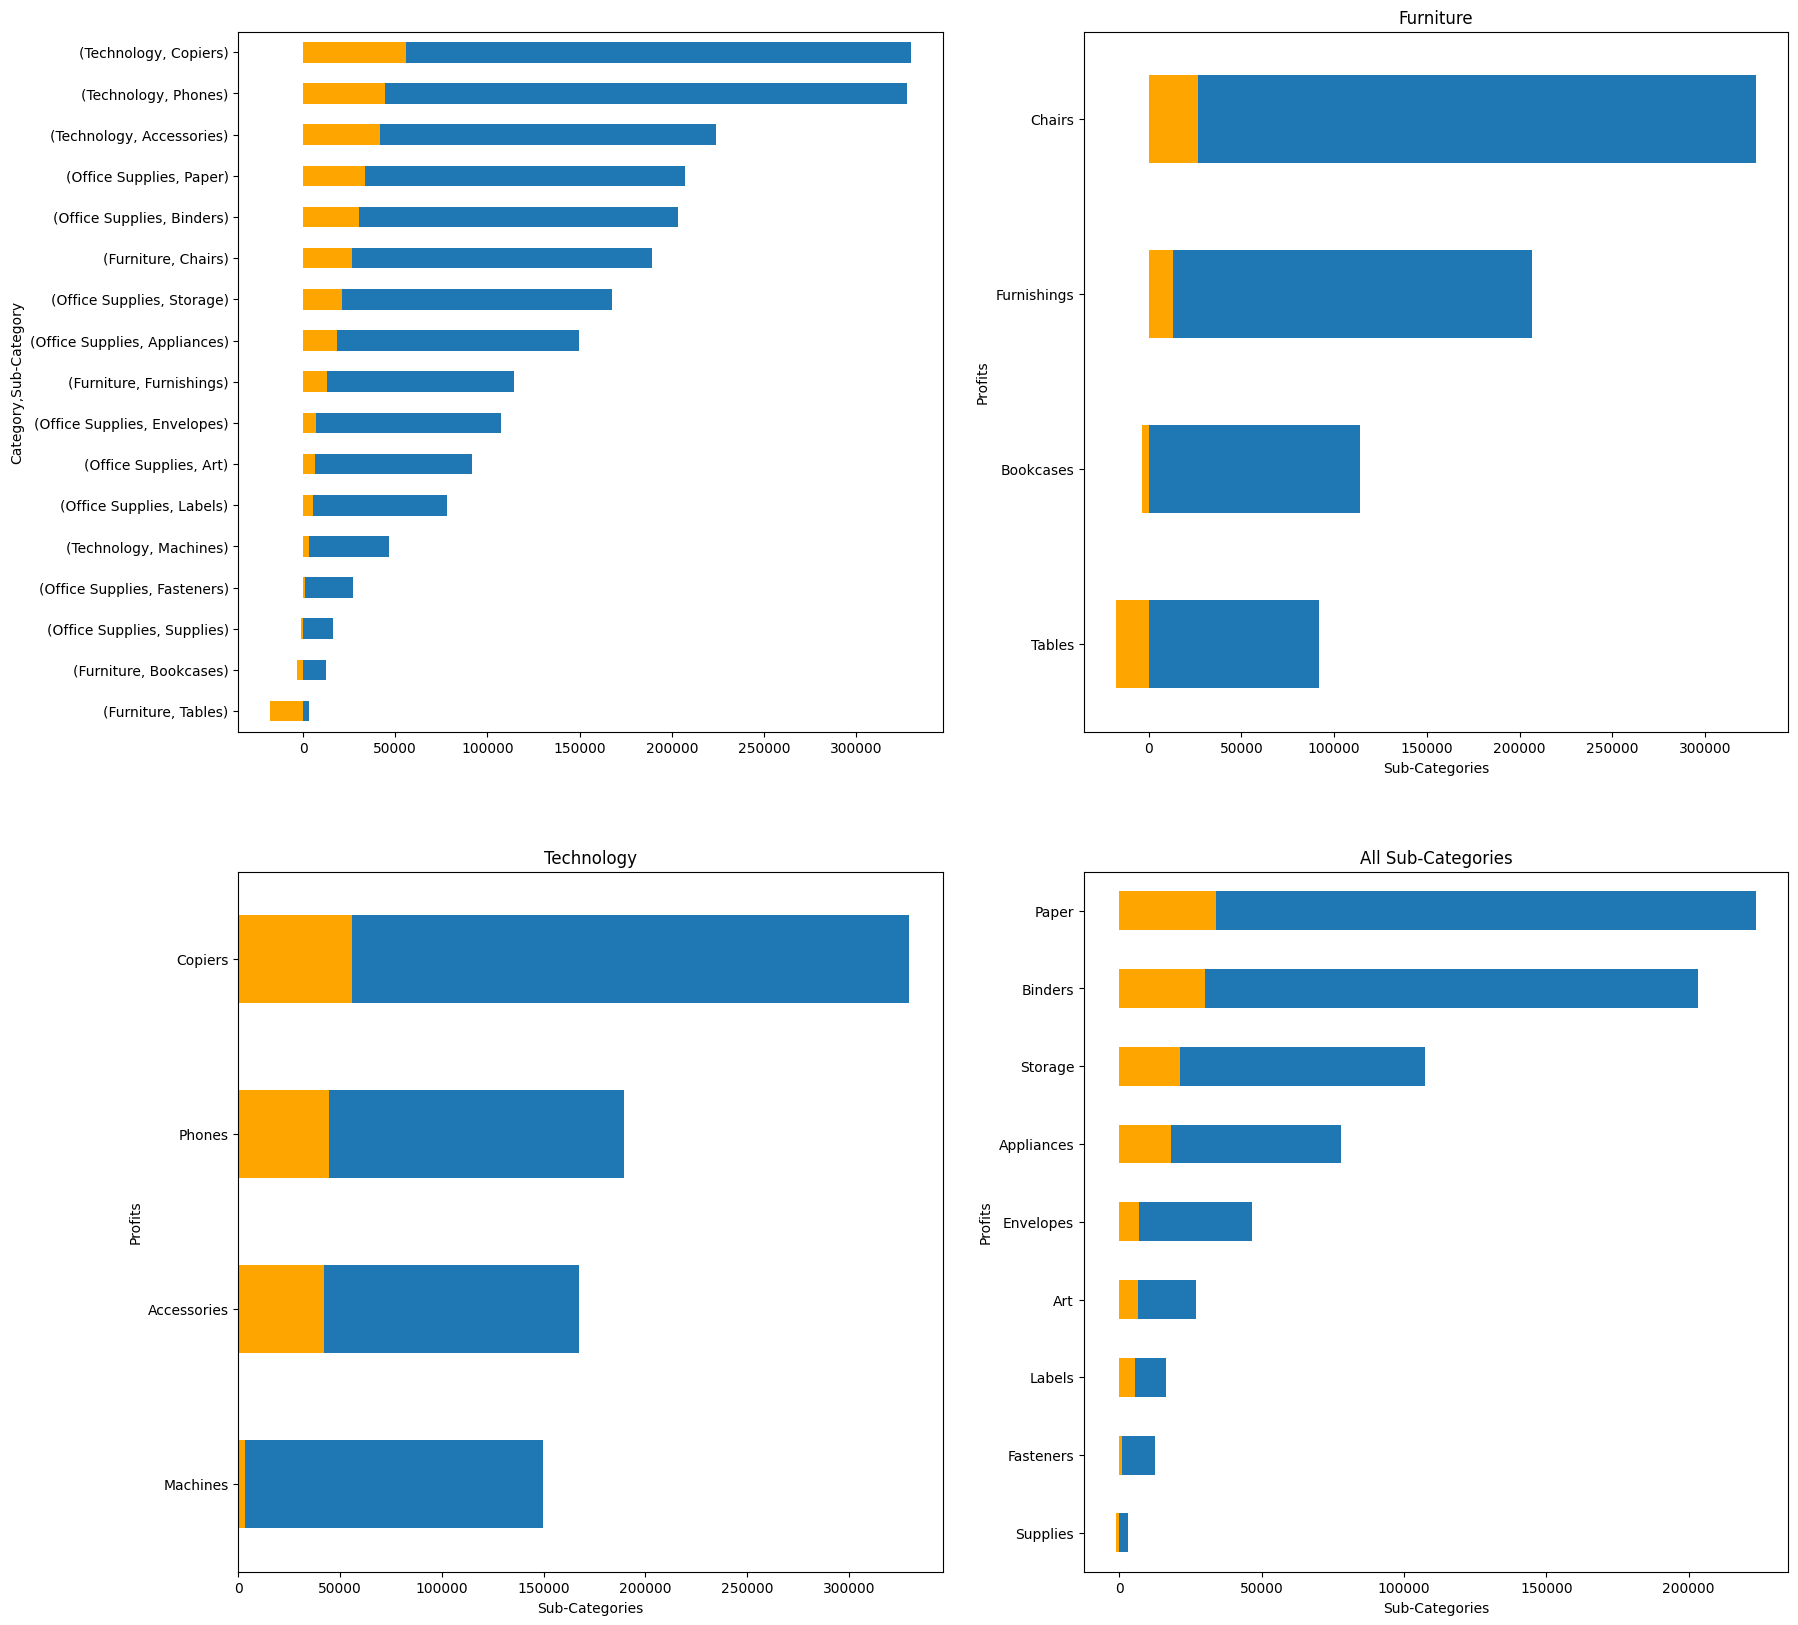

In [ ]:
#Sales
fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
x["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax1)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

#Technology
x["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")

#Office Supplies
x["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

#Total
x.sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax0)
ax3.set_title("All Sub-Categories")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")


#Profit

#Furniture
y["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax1, color="orange")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")

#Technology
y["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax2, color="orange")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profits")

#Office Supplies
y["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax3, color="orange")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profits")

#Total
y.sort_values(ascending=True).plot(kind="barh", figsize=(20,20), ax=ax0, color="orange")
ax3.set_title("All Sub-Categories")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profits")



1. Highest Sales and Profit in : Copiers, Phones and Accessories (Technology)
2. Lowest Sales and Profit in : Tables, Bookcases (Furniture) and Suppliers (Office Suppliers)

**STEP 8: Analyzing States**

In [ ]:
# States
state = df["State"].value_counts()
state

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

Text(0, 0.5, 'Number of Buyers')

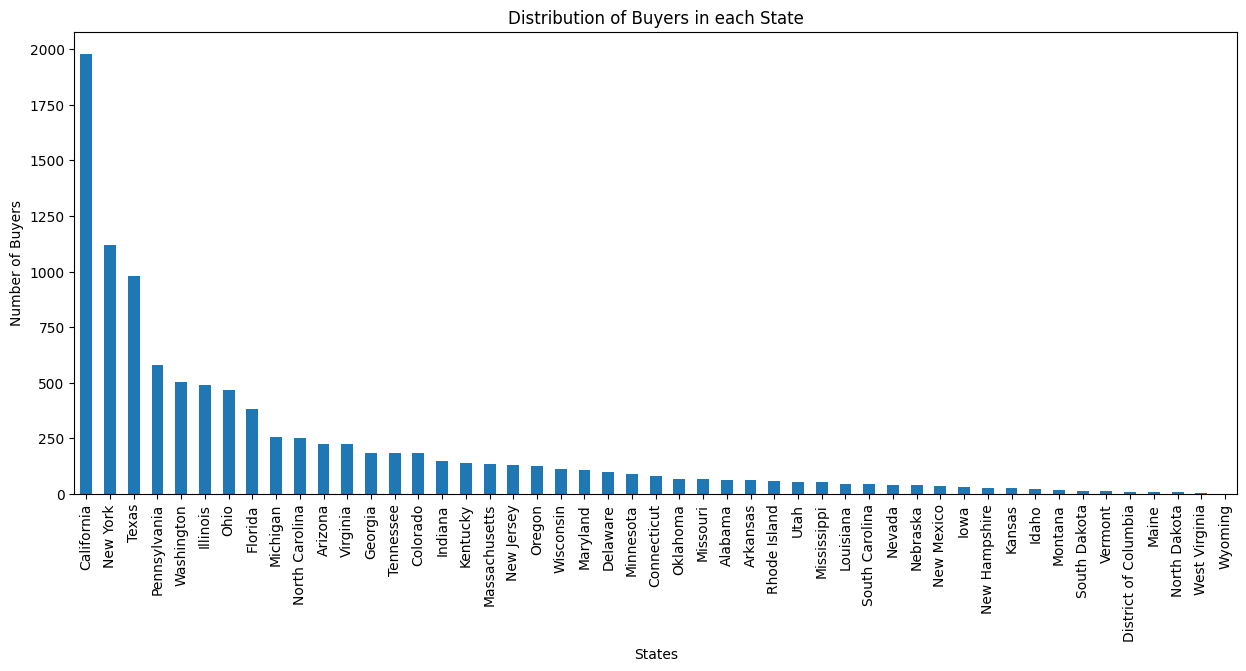

In [ ]:
# Plotting bar graph for "States"
state.plot(kind="bar", figsize=(15,6))
plt.title("Distribution of Buyers in each State")
plt.xlabel("States")
plt.ylabel("Number of Buyers")

1. Most buyers belong to "California","New York" and "Texas"
2. Least buyers belong to "Wyoming", "West Virginia" and "North Dakota"

In [ ]:
ss= d.groupby(["State"]). Sales.sum()
sp= d.groupby(["State"]). Profit.sum()

Text(0.5, 0, 'States')

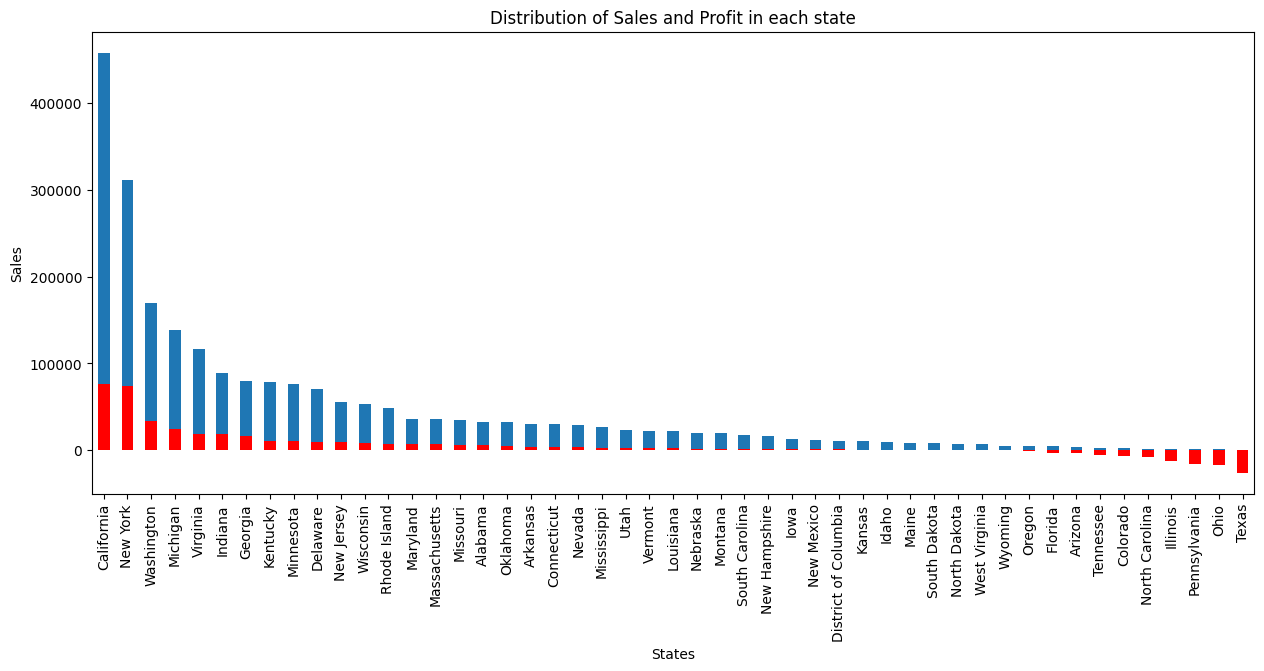

In [ ]:
# State wise Distribution of Sales
ss.sort_values(ascending = False).plot(kind="bar", figsize=(15,6))
plt.xlabel("States")
plt.ylabel("Sales")

# State wise Distribution of Profit
sp.sort_values(ascending = False).sort_values(ascending = False).plot(kind="bar", figsize=(15,6),color="red")
plt.title("Distribution of Sales and Profit in each state")
plt.xlabel("States")


1. Maximum Sales and Profit in cities: "California" and "New York"
2. Minimum Sales and Profit in cities: "Oregon", "Florida", "Arizona","Tennessee", "Colorado", "North Carolina", "Illionis", "Pennsylvania","Ohio" and "Texas"

**STEP 9: Analyzing Segments**

In [ ]:
seg = df["Segment"].value_counts()
seg

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

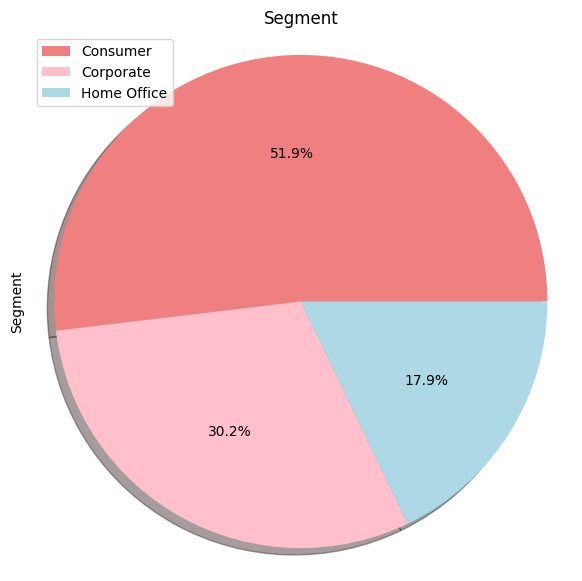

In [ ]:
seg.plot(kind="pie", figsize=(7,7), autopct="%1.1f%%",
         shadow = True, labels = None, colors=["lightcoral", "pink", "lightblue"])
plt.title("Segment")
plt.axis("equal")
plt.legend(labels=seg.index,loc="upper left")
plt.show()

Major business distribution in Consumer Segment and Least in Home Office

**Sales and Profit in different segments**

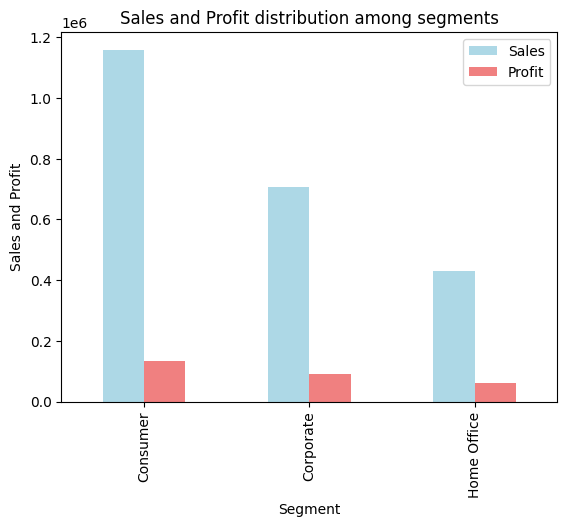

In [ ]:
df.groupby("Segment")[["Sales","Profit"]].sum().plot(kind="bar",color=["lightblue","lightcoral"])
plt.ylabel("Sales and Profit")
plt.xlabel("Segment")
plt.title("Sales and Profit distribution among segments")
plt.show()

Most Profit and Sales in Consumer segment and Least in Home Office

***STEP 10: Analyzing Region ***

In [ ]:
reg = df["Region"].value_counts()
reg

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

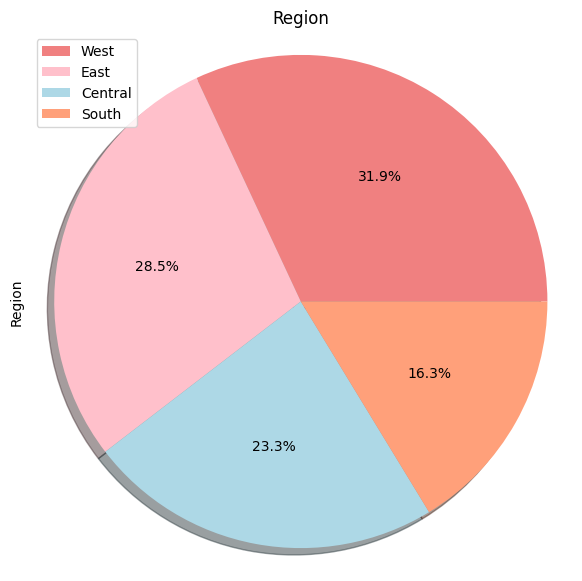

In [ ]:
reg.plot(kind="pie", figsize=(7,7), autopct="%1.1f%%",
         shadow = True, labels = None, colors=["lightcoral", "pink", "lightblue","lightsalmon"])
plt.title("Region")
plt.axis("equal")
plt.legend(labels=reg.index,loc="upper left")
plt.show()

Company deals majorly in Western region and least in Southern region

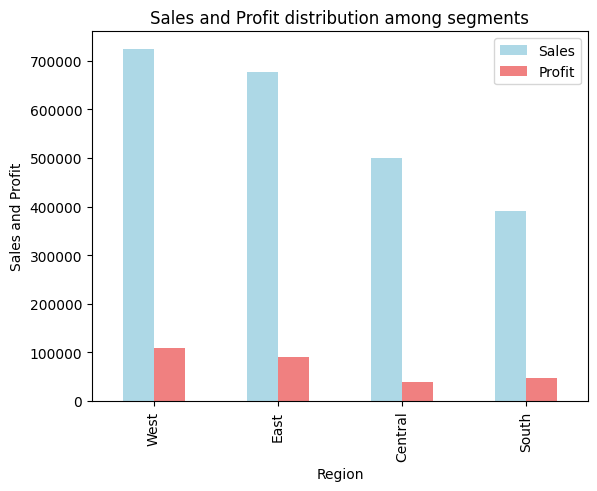

In [ ]:
df.groupby("Region")[["Sales","Profit"]].sum().sort_values(by=["Sales","Profit"],ascending=False).plot(kind="bar",color=["lightblue","lightcoral"])
plt.ylabel("Sales and Profit")
plt.xlabel("Region")
plt.title("Sales and Profit distribution among segments")
plt.show()

More Profit from Western and Eastern Regions whereas lesser profits from Central and Southern regions

**STEP 11. Analysing Region wise Ship Mode**

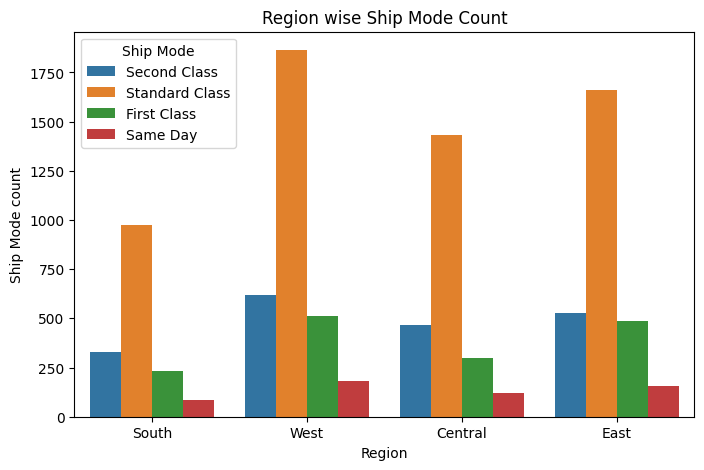

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Region", hue = "Ship Mode", data=df)
plt.title("Region wise Ship Mode Count")
plt.ylabel("Ship Mode count")
plt.show()

1. Most opted mode: Standard Class
2. Least opted mode: Same Day

**STEP 12: Analysing Relation between Profit and Discount**

In [ ]:
# Correlation
df["Discount"].corr(df["Profit"])

-0.21993898249765037

<function matplotlib.pyplot.show(close=None, block=None)>

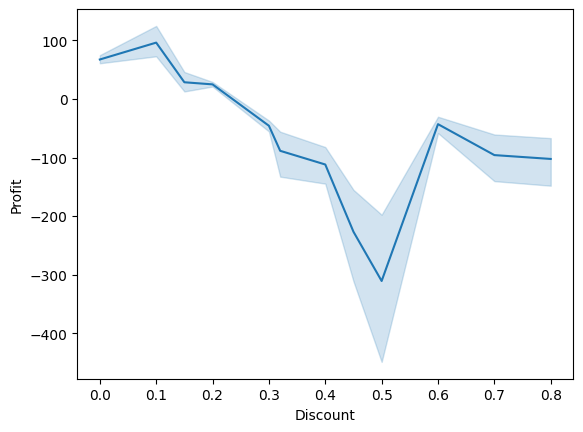

In [ ]:
# Line Plot
sns.lineplot(x="Discount", y="Profit", data=df)
plt.show

Profit and Discount have negative relation. (i.e when profit increase discount decreases and vice versa)

**STEP 13: Analysing Relation among Sales, Profit and Discount**

<ipython-input-90-04ad57e82312>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


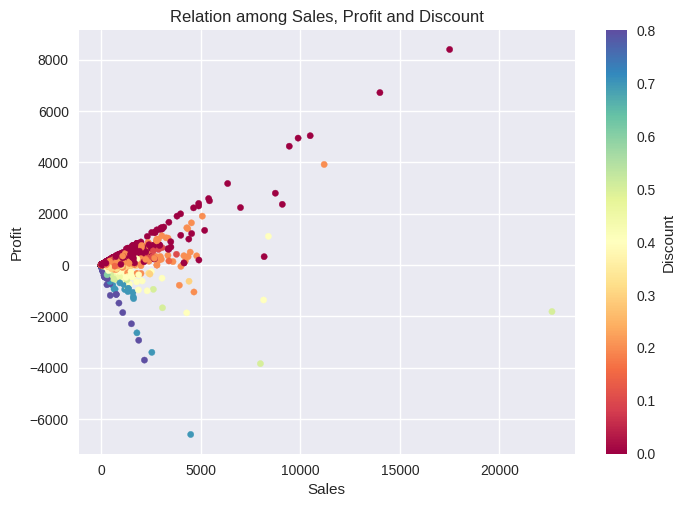

In [ ]:
plt.style.use("seaborn")
df.plot(kind="scatter", x="Sales", y="Profit", c="Discount", colormap="Spectral")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Relation among Sales, Profit and Discount")
plt.show()

1. As Discount increases Profit decreases
2. Discount and Sales have a lesser relation but Sales also decrease with increasing discount

# **OVERALL ANALYSIS**



1.   As Discount increases Profit decreases

2.   As Discount increases Sales decreases

3.   As Sales increases Profit increases


4.   Most correlation: Sales and Profit

     Least correlation: Discount and Quantity


5.   Most opted Ship Mode: Standard Class

     Least opted Ship Mode: Same Day


6.   Maximum Profit and Sales: Standard Class

     Minimum Profit and Sales: Same Day


7.   Major distribution of business is in Office Supplies and Least in Technology


8.   Maximum Profit and Sales in Category: Technology

     Minimum Profit and Sales in Category: Office Supplies


9.   Major distribution of business is in Binders, Paper and Furnishings

     Least distribution of business is in Copiers, Machines and Supplies


10.  Highest Sales and Profit in: Copiers, Phones and Accessories(Technology)

     Lowest  Sales and Profit in: Tables, Bookcases (Furniture) and Supplies (Office Supplies)

